In [1]:
import re
import json

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

import pandas as pd
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])
x = train_df['text'][:30000]
y = train_df['label'][:30000]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00


In [4]:
import contractions
def handle_punctuation(text):
    # Expand contractions
    text = contractions.fix(text)

    # Replace dots that are not between numbers with a space
    text = re.sub(r'(?<!\d)\.|\.(?!\d)', ' ', text)

    # Handle punctuation (excluding numbers)
    text = re.sub(r"[^\w\s\.]", r" ", text)

    # Handle dots at the end of sentences (excluding numbers)
    text = re.sub(r"\b\.(?!\d)", r" ", text)

    return text

new_x = []
for i, text in enumerate(x):
    new_text = text.lower().replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\\n', ' ').replace('\\r', ' ').replace('\\t', ' ')
    new_x.append(handle_punctuation(new_text))
x = new_x

import json
slang_dict = json.load(open('/kaggle/input/english-slang/slang.json', 'r'))

new_x = []
for text in x:
  words = text.split()
  corrected_slang_words = []
  for word in words:
    if word in slang_dict:
      word = slang_dict[word].lower()
    corrected_slang_words.append(word)

  new_x.append(' '.join(corrected_slang_words))

x = new_x

In [5]:
data = {"text":x,"labels":y}
df = pd.DataFrame(data)

In [6]:
df.head()

,text,labels
0,dr goldberg offers everything i look for in a ...,4
1,unfortunately the frustration of being dr gold...,1
2,been going to dr goldberg for over 10 years i ...,3
3,got a letter in the mail last week that said d...,3
4,i do not know what dr goldberg was like before...,0


In [7]:
import nltk
# Conduct POS Tagging (takes a bit of time to run this code)
pos_tags = (df.text.apply(lambda text: nltk.pos_tag(nltk.word_tokenize(text))))

In [41]:
def pos_tag_count(list_of_postag):
    # Return dictionary of dataframes with postags as keys and counts as values
    dict_of_postags = {}
    for tag in list_of_postag:
        dict_of_postags[tag[1]] = dict_of_postags.get(tag[1], 0) + 1
    return dict_of_postags
        
postags_df = pd.DataFrame(pos_tags.apply(pos_tag_count).to_dict()).T

In [42]:
pos_tag_col = [col for col in postags_df.columns if re.findall('[A-Z]+', col)]

postags_df_ = postags_df[pos_tag_col].fillna(0)

In [43]:
postags_df_.head

<bound method NDFrame.head of          NN  VBZ  VBP    IN    DT    JJ   PRP    CC   TO    VB  ...  JJS   EX  \
0      12.0  5.0  8.0  10.0   4.0   7.0   9.0   4.0  6.0   6.0  ...  0.0  0.0   
1      24.0  9.0  7.0  14.0   9.0  11.0   8.0   3.0  3.0   6.0  ...  0.0  0.0   
2      12.0  7.0  2.0  14.0   7.0   9.0   7.0   6.0  2.0   4.0  ...  0.0  0.0   
3      11.0  1.0  1.0   6.0   5.0   7.0   2.0   0.0  3.0   5.0  ...  0.0  0.0   
4      36.0  7.0  8.0  19.0  24.0  13.0  17.0  10.0  7.0  19.0  ...  0.0  0.0   
...     ...  ...  ...   ...   ...   ...   ...   ...  ...   ...  ...  ...  ...   
29995   5.0  1.0  2.0   2.0   4.0   2.0   1.0   3.0  1.0   1.0  ...  0.0  0.0   
29996  42.0  4.0  6.0  18.0  24.0  13.0   3.0   7.0  1.0   5.0  ...  3.0  2.0   
29997  24.0  4.0  6.0  18.0  12.0  11.0   4.0   5.0  2.0   5.0  ...  0.0  1.0   
29998  14.0  3.0  1.0   5.0  10.0  14.0   4.0   6.0  2.0   5.0  ...  0.0  0.0   
29999  22.0  2.0  6.0  12.0   9.0   8.0   9.0   4.0  4.0   6.0  ...  0.0  0.0  

In [37]:
pd.get_dummies(df.labels).head

<bound method NDFrame.head of            0      1      2      3      4
0      False  False  False  False   True
1      False   True  False  False  False
2      False  False  False   True  False
3      False  False  False   True  False
4       True  False  False  False  False
...      ...    ...    ...    ...    ...
29995  False   True  False  False  False
29996   True  False  False  False  False
29997  False  False   True  False  False
29998  False  False  False   True  False
29999   True  False  False  False  False

[30000 rows x 5 columns]>

In [44]:
pt_df = postags_df_

In [ ]:
import seaborn as sns
pt_df['0'] = pd.get_dummies(df.labels)[0]
pt_df['1'] = pd.get_dummies(df.labels)[1]
pt_df['2'] = pd.get_dummies(df.labels)[2]
pt_df['3'] = pd.get_dummies(df.labels)[3]
pt_df['4'] = pd.get_dummies(df.labels)[4]




In [49]:
pt_df.corr()[['0','1','2','3','4']]

,0,1,2,3,4
NN,0.061131,0.058885,0.003624,-0.038499,-0.089251
VBZ,-0.044270,0.012891,0.042756,0.021452,-0.034754
VBP,-0.005431,0.019128,0.002538,0.005764,-0.023065
IN,0.076849,0.069558,0.007276,-0.049366,-0.109376
DT,0.056698,0.071544,0.015575,-0.039708,-0.109249
JJ,-0.044713,0.045126,0.042266,0.016934,-0.062883
PRP,0.135931,0.056085,-0.025560,-0.075824,-0.094698
CC,0.021868,0.051673,0.013056,-0.021438,-0.068454
TO,0.151342,0.062274,-0.032089,-0.085674,-0.100126
VB,0.148402,0.065715,-0.020876,-0.087701,-0.110384


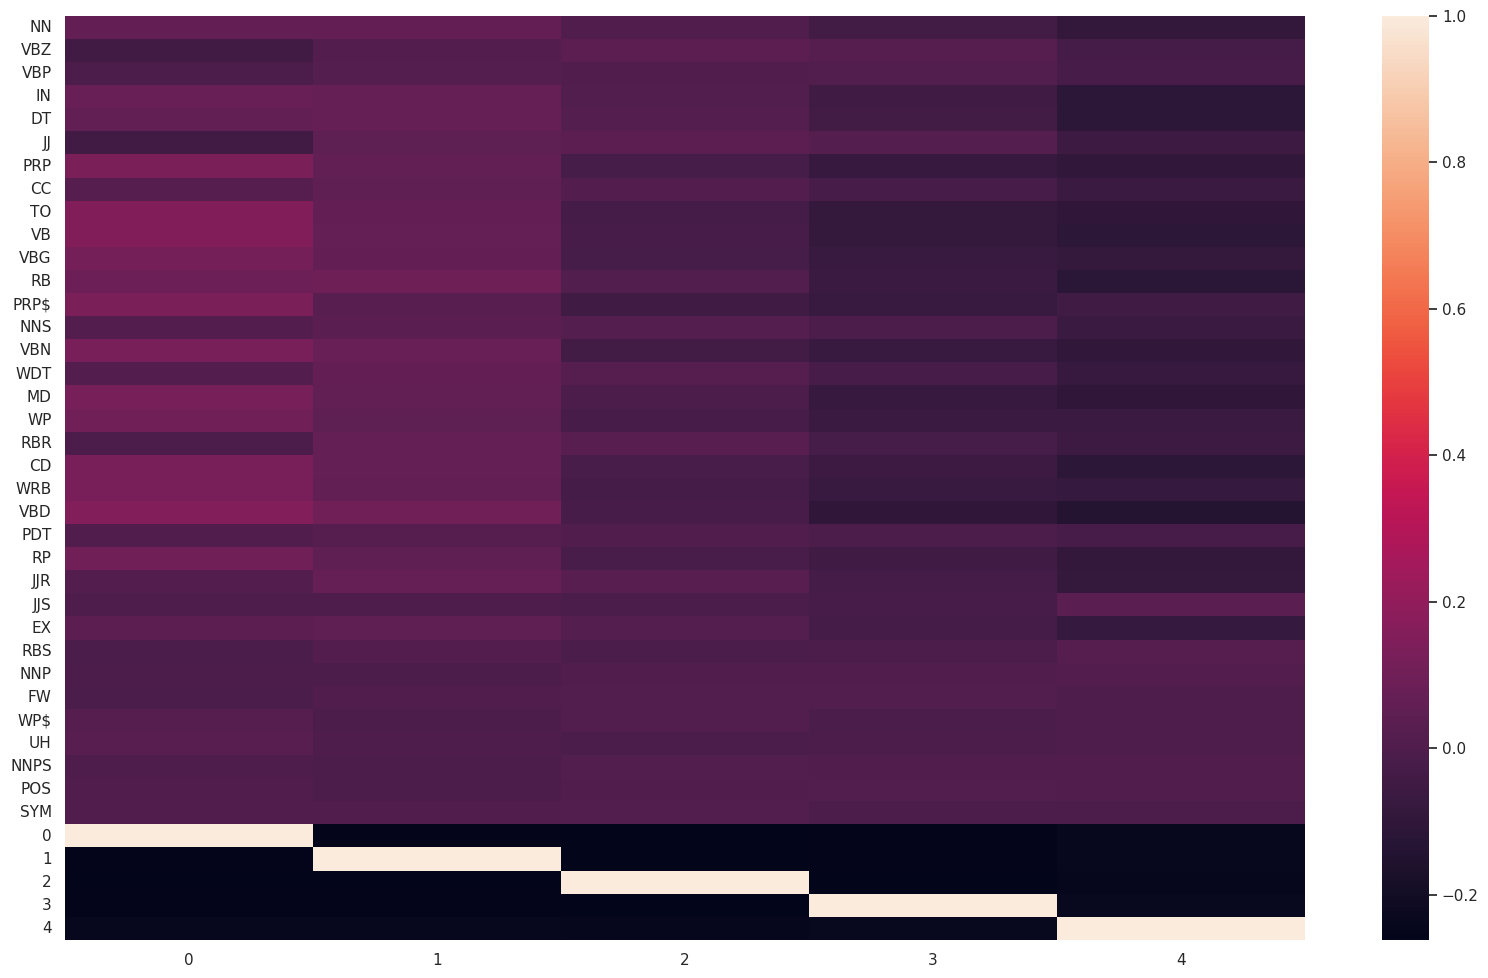

In [50]:
sns.set(font_scale=1)
plt.figure(figsize=(20,12))
sns.heatmap(pt_df.corr()[['0','1','2','3','4']])
plt.show()

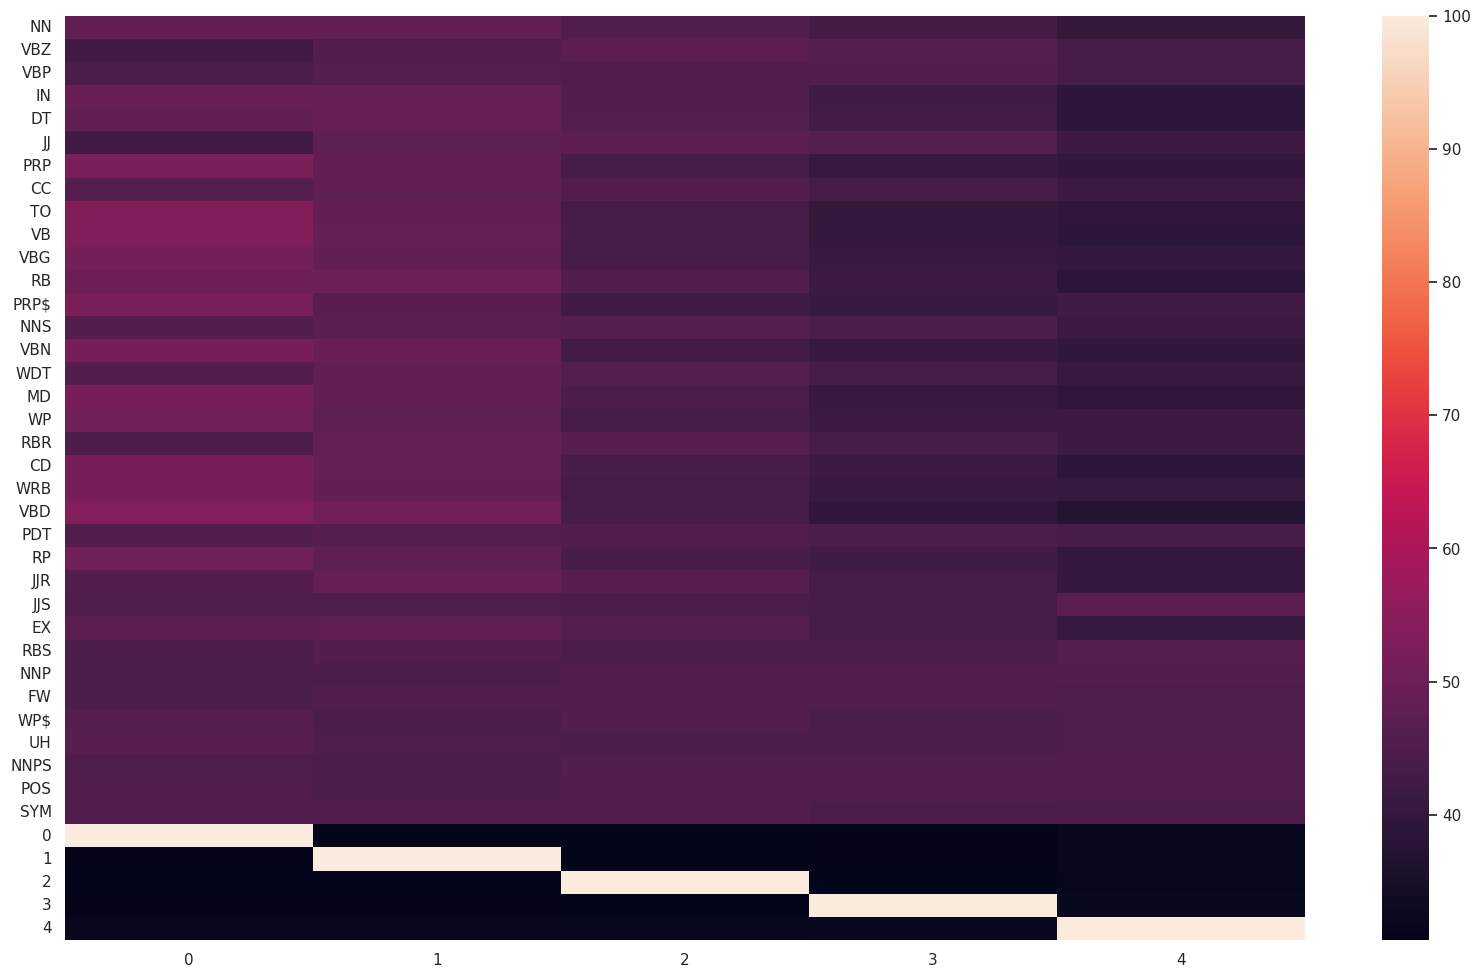

In [51]:
corr_matrix = pt_df.corr()[['0','1','2','3','4']]
norm_corr_matrix = (corr_matrix + 1) / 2
new_min, new_max = -10, 100
scaled_corr_matrix = norm_corr_matrix * (new_max - new_min) + new_min
sns.set(font_scale=1)
plt.figure(figsize=(20,12))
sns.heatmap(scaled_corr_matrix)
plt.show()

In [59]:
import pandas as pd

# Example DataFrame
df = corr_matrix

# Find the max value in each row
max_values_per_row = df.max(axis=1)
print("Max values in each row:")
print(max_values_per_row)



Max values in each row:
NN      0.061131
VBZ     0.042756
VBP     0.019128
IN      0.076849
DT      0.071544
JJ      0.045126
PRP     0.135931
CC      0.051673
TO      0.151342
VB      0.148402
VBG     0.116000
RB      0.088405
PRP$    0.132841
NNS     0.038213
VBN     0.127063
WDT     0.061398
MD      0.119335
WP      0.103850
RBR     0.065661
CD      0.124815
WRB     0.125682
VBD     0.155428
PDT     0.024043
RP      0.102524
JJR     0.072413
JJS     0.036803
EX      0.049923
RBS     0.019526
NNP     0.009586
FW      0.007983
WP$     0.021969
UH      0.025651
NNPS    0.007292
POS     0.004511
SYM     0.008270
0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
dtype: float64


**Although we say that the correlation generally decreases as the score increases, there is still a very low correlation.**